<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Probabilidade_Eventos_Teoremas_Estatistica_RedesBayesianas_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math

- Permutação

In [ ]:
math.factorial(3) # 3! = 3.2.1=6

6

In [ ]:
#permutação para subconjuntos

#vamos criar uma senha com 5 caracteres que pode ser composto por letras e numeros de 0 a 9, # letras e numeros nao podem repetir

#espaço amostral : 26 letras + 10 digitos = 36

In [ ]:
math.factorial(36) / math.factorial(36 - 5)

45239040.0

In [ ]:
# outro exemplo: igual o anterior mas agora os numeros podem ser repetidos

In [ ]:
math.pow(36, 5) #pow base exponencial, 36 elevado a 5

60466176.0

- Combinação

2 letras COM ABCDEF SEM REPETIÇÃO

In [ ]:
math.factorial(6) / (math.factorial(2) * math.factorial(6 -2))

15.0

2 letras com ABCDEF, COM REPETIÇÕES

In [ ]:
math.factorial(6 + 2 -1) / (math.factorial(2) * math.factorial(6 -1))

21.0

- Interseção 


In [ ]:
a = (0,1,2,3,4,5,6,7)
b = (0,2,4,6,8)

In [ ]:
set(a) & set(b)

{0, 2, 4, 6}

- União

In [ ]:
set(a) | set(b)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

- Diferença

In [ ]:
set(a).difference(set(b))

{1, 3, 5, 7}

In [ ]:
set(b).difference(set(a))

{8}

**Eventos**

- Eventos independentes : o resultado de um evento nao influencia na respota do outro evento

In [ ]:
# ex jogar uma moeda duas vezes

In [ ]:
#calcular a prob de dar coroa em duas tentativas = 1/2 * 1/2 = 25%





- Eventos dependentes: o resultado de um evento influencia na resposta do outro evento

In [ ]:
# ex baralho com 52 cartas  e 13 sao espada

# qual a prob de tirar duas espada?

# 13/52 * 12/51 = 5,88%

- Probabilidade Condicional

- Redes Bayesianas

**probabilidade e distribuição normal**

In [ ]:
base = np.array([126, 148, 162, 180, 121, 171, 162, 137, 133,
                       160, 175, 182, 183, 156, 147, 179, 170, 180,
                       180, 178, 157, 166, 174, 154, 178, 196, 165,
                       161, 193, 124, 133, 158, 189, 169, 130, 165,
                       149, 179, 158, 149, 140, 151, 150, 146, 181,
                       188, 190, 157, 167, 163, 150, 149, 182, 169,
                       151, 139, 148, 155, 156, 170, 150, 170, 172,
                       168, 192, 143, 129, 167, 177, 166, 166, 179,
                       150, 180, 168, 161, 171, 161, 129, 133, 122,
                       121, 130, 138, 157, 133, 168, 179, 179, 158,
                       147, 179, 180, 154, 139, 169, 170, 150, 178, 140.8])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


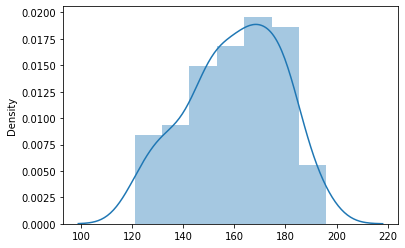

In [ ]:
sns.distplot(base);

In [ ]:
media = np.mean(base)
media

160.028

In [31]:
mediana = np.median(base)
mediana

161.5

In [ ]:
desvio_padrao = np.std(base)
desvio_padrao

18.37404734945461

In [ ]:
np.quantile(base,[0.25, 0.5, 0.75]) #quartis

array([148.75, 161.5 , 175.5 ])

In [23]:
#CACULAR A PROBABILIDADE DE SELECIONAR UMA PESSOA NO Q1

(148.75 - media) / desvio_padrao  #valor padronizado

-0.6138005299270524

In [26]:
#CACULAR A PROBABILIDADE DE SELECIONAR UMA PESSOA NO Q3

(175.5 - media) / desvio_padrao



0.8420572618399864

In [28]:
p = 1 - 0.8420572618399864
p

0.15794273816001358

In [29]:
#CACULAR A PROBABILIDADE DE SELECIONAR UMA PESSOA entre Q2-Q3

(161.5 - media) / desvio_padrao

0.08011299698994741

In [32]:
(159.25 - media) / desvio_padrao # P = 0.5

-0.04234233128952314

**ML com Naive Bayes com probabilidade**

In [33]:
base = pd.read_csv('/content/credit_data.csv')

In [34]:
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [49]:
base.isnull().sum()

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

In [50]:
base.loc[pd.isnull(base['age'])]

,i#clientid,income,age,loan,c#default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [51]:
base['age'].fillna(base['age'].mean(), inplace = True)

In [52]:
base.isnull().sum()

i#clientid    0
income        0
age           0
loan          0
c#default     0
dtype: int64

agora sem valores faltantes

In [53]:
x_base = base.iloc[:,1:4].values
y_base = base.iloc[:,4].values

In [55]:
x_base, y_base

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0]))

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_base_treino, x_base_teste, y_base_treino, y_base_teste = train_test_split(x_base, y_base, test_size=0.25, random_state=1)

In [58]:
x_base_treino.shape

(1500, 3)

In [59]:
y_base_treino.shape

(1500,)

In [60]:
x_base_teste.shape

(500, 3)

In [61]:
y_base_teste.shape

(500,)

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nb = GaussianNB()

In [64]:
nb.fit(x_base_treino, y_base_treino)

GaussianNB()

In [65]:
previsao = nb.predict(x_base_teste)

In [66]:
previsao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [67]:
y_base_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [70]:
from sklearn.metrics import accuracy_score, classification_report

In [69]:
accuracy_score(y_base_teste, previsao)

0.922

otima previsão

In [71]:
from yellowbrick.classifier import ConfusionMatrix

0.922

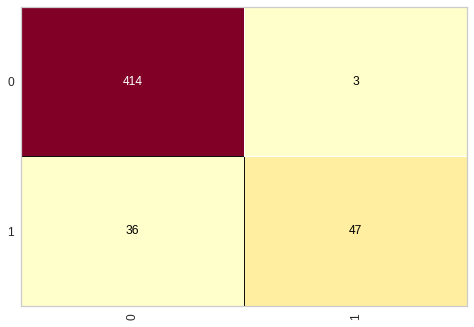

In [72]:
cm = ConfusionMatrix(nb)
cm.fit(x_base_treino, y_base_treino)
cm.score(x_base_teste, y_base_teste)

In [73]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       417
           1       0.94      0.57      0.71        83

    accuracy                           0.92       500
   macro avg       0.93      0.78      0.83       500
weighted avg       0.92      0.92      0.91       500



excelente modelo, apesar que ele previu bem melhor os classificadores de 0 que é  a clase que vai pagar do que os de 1 que é a classe que não vai pagar

agora vamos ver a probabilidade no Modelo

In [75]:
x_base[0].shape

(3,)

In [76]:
x_novo = x_base[0].reshape(1,-1)

In [83]:
x_novo.shape

(1, 3)

In [84]:
x_novo

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03]])

In [78]:
nb.predict(x_novo)

array([0])

In [81]:
prev = nb.predict_proba(x_novo)
prev

array([[1.00000000e+00, 1.07948546e-10]])

In [82]:
np.argmax(prev)

0

aqui vemos a classe que tem mais valores, que é o 0